In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt
# imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Logistic regression without class imbalance handling


In [39]:
url_data = "https://raw.githubusercontent.com/jealcalat/AEM-ITESO/main/datasets/default_islp.csv"
default = pd.read_csv(url_data)
default['default'] = default['default'].apply(lambda x: 1 if x == 'Yes' else 0)
X = default[['balance']]
# target, y = 0, no default, y = 1, default
y = default['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.9726666666666667
F1: 0.36923076923076925


Text(50.72222222222221, 0.5, 'True')

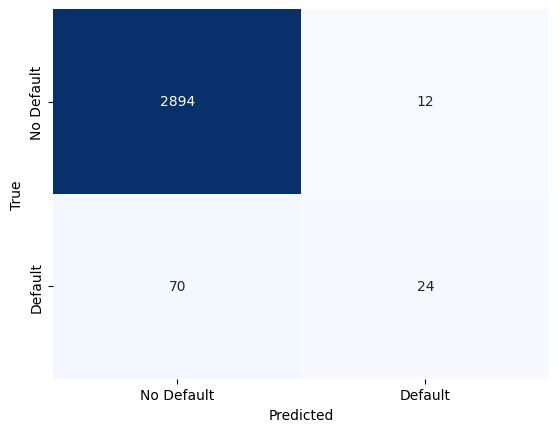

In [40]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(
    f'Accuracy: {accuracy}\nF1: {f1}'
)
sns.heatmap(conf_matrix, 
            annot=True,
            fmt='d',
            cbar=False,
            cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default']
            )
plt.xlabel('Predicted')
plt.ylabel('True')

In [41]:
smote = SMOTE(random_state=42) # (x_i, y_i)
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f'Before SMOTE: {y_train.value_counts()}')
print(f'After SMOTE: {y_train_smote.value_counts()}')

Before SMOTE: default
0    6761
1     239
Name: count, dtype: int64
After SMOTE: default
0    6761
1    6761
Name: count, dtype: int64


In [42]:
model = LogisticRegression()
model.fit(x_train_smote, y_train_smote)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(
  f'accuracy: {accuracy}\nF1: {f1}'
)

accuracy: 0.8713333333333333
F1: 0.3007246376811594


Text(50.72222222222221, 0.5, 'True')

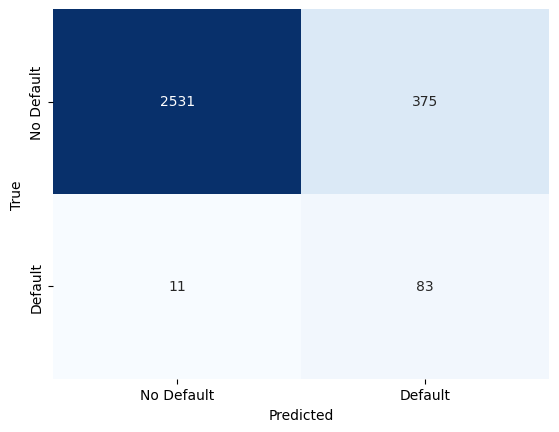

In [43]:
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cbar=False,
    cmap='Blues',
    xticklabels=['No Default', 'Default'],
    yticklabels=['No Default', 'Default']
)
plt.xlabel('Predicted')
plt.ylabel('True')

In [44]:
TN, FP, FN, TP = conf_matrix.ravel()
recall = TP / (TP + FN)
print(f'Recall: {recall}')
precision = TP / (TP + FP)
f1 = 2 * (recall * precision) / (recall + precision)
print(f'precision: {precision}\nF1: {f1}')

Recall: 0.8829787234042553
precision: 0.1812227074235808
F1: 0.3007246376811595


In [49]:
scaler = StandardScaler()
X = default[['balance', 'income']]
y = default['default']
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, test_size=0.2, random_state=42)
# se puede usar validación cruzada para escoger el mejor C
model = LogisticRegression(penalty='l1', solver='liblinear', C=1) # C = 1/lambda
res = model.fit(X_train, y_train)

In [50]:
res.coef_

array([[2.76739122, 0.26628697]])